In [5]:
import numpy as np, os, argparse, sys
from pathlib import Path
from utils import params, makeDataLoader, plot_training, plot_lr
import torch, random

from model import train_model


torch.manual_seed(0)
random.seed(0)
np.random.seed(0)

def load_data():

    data_train = {'label': np.load('data/y_train.npy')-1, 'imgs': np.load('data/x_train.npy')}
    data_test = {'label': np.load('data/y_test.npy')-1, 'imgs': np.load('data/x_test.npy')}

    print('Train data shape: ', data_train['imgs'].shape)
    return data_train, data_test

ep = params.ep
bs = params.bs
upper_lr = params.upper_lr
lower_lr = params.lower_lr
plane_lr = params.plane_lr

output = params.output

if not Path('data/x_train.npy').exists():
    os.system('wget -q https://www.dropbox.com/s/sakfqp6o8pbgasm/data.tgz')
    os.system('tar xvzf data.tgz; rm *.tgz; rm ._*; mkdir data; mv *.npy data')
    
data_train, data_test = load_data()

trainloader, devloader = makeDataLoader(crop_size=250, data_train=data_train, data_test=data_test, batch_size=bs)

if not Path(output).exists():
    os.mkdir(output)

./._x_test.npy
x_test.npy
./._x_train.npy
x_train.npy
./._y_test.npy
y_test.npy
./._y_train.npy
y_train.npy
Train data shape:  (791, 250, 250, 3)


Change on epoch 25


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/densenet121_ra-50efcf5c.pth" to /root/.cache/torch/hub/checkpoints/densenet121_ra-50efcf5c.pth


Total number of parameters:  27925396


Epoch:   0: : 25it [00:23,  1.06it/s, loss:2.982 f1:0.065 error:0.882 dev_loss: 2.993 f1_dev:0.005 dev_error:0.948]
Epoch:   1: : 25it [00:18,  1.34it/s, loss:2.898 f1:0.309 error:0.631 dev_loss: 2.983 f1_dev:0.037 dev_error:0.915]
Epoch:   2: : 25it [00:18,  1.36it/s, loss:2.753 f1:0.401 error:0.518 dev_loss: 2.818 f1_dev:0.177 dev_error:0.761]
Epoch:   3: : 25it [00:18,  1.34it/s, loss:2.544 f1:0.430 error:0.501 dev_loss: 2.453 f1_dev:0.301 dev_error:0.622]
Epoch:   4: : 25it [00:18,  1.35it/s, loss:2.288 f1:0.474 error:0.464 dev_loss: 2.114 f1_dev:0.373 dev_error:0.560]
Epoch:   5: : 25it [00:18,  1.34it/s, loss:2.031 f1:0.551 error:0.394 dev_loss: 1.850 f1_dev:0.479 dev_error:0.471]
Epoch:   6: : 25it [00:18,  1.35it/s, loss:1.802 f1:0.591 error:0.354 dev_loss: 1.645 f1_dev:0.507 dev_error:0.441]
Epoch:   7: : 25it [00:18,  1.36it/s, loss:1.583 f1:0.677 error:0.273 dev_loss: 1.464 f1_dev:0.582 dev_error:0.365]
Epoch:   8: : 25it [00:18,  1.34it/s, loss:1.394 f1:0.710 error:0.243 de

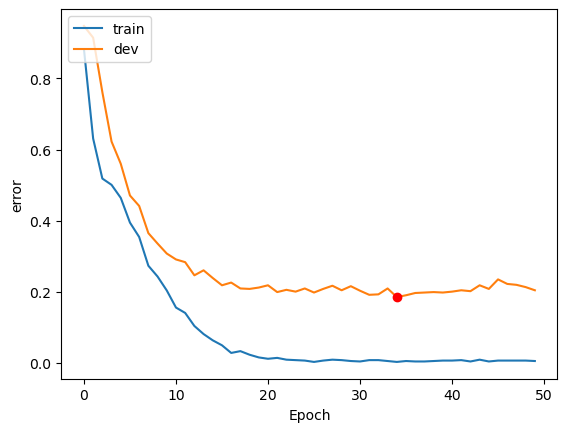

In [6]:
history, model, lr_history = train_model(trainloader, devloader, epoches = ep, batch_size = bs, 
                                lower_lr= lower_lr, upper_lr=upper_lr, output=os.path.join(output, 'best_model'), freeze_at=-1)
plot_training(history, output)

In [7]:
index = np.argmin(history['dev_error'])
print(f'Model Checkpoint saved at epoch {index} with accuracy {1 - history["dev_error"][index]:.3f}')

Model Checkpoint saved at epoch 34 with accuracy 0.815


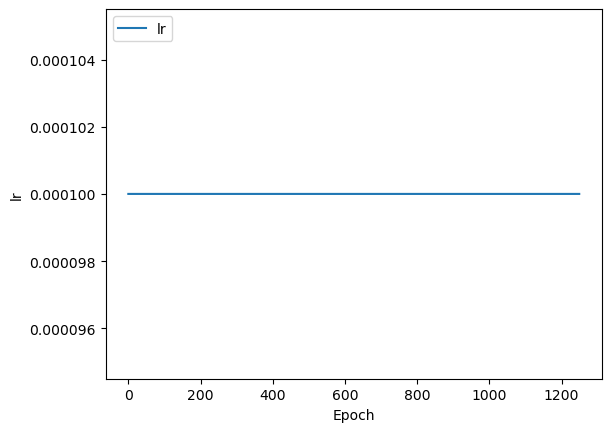

In [8]:
from matplotlib import pyplot as plt
def plot_lr(lr_history):
  
    plt.plot(lr_history)
    plt.legend(['lr'], loc='upper left')
    plt.ylabel('lr')
    plt.xlabel('Epoch')
    plt.savefig(os.path.join(output, f'lr_history.png'))

plot_lr(lr_history)

In [9]:
max(lr_history[900:])

0.0001